# Loan Prediction

It is very important for any bank/lender to decide that for which applicant should the loan be approved. The objective of this project is to build various machine learning models on a loan dataset to help predict the outcomes for new applicants.


For this project we are using a dataset from kaggle. The data definition is as follows:
     1. Loan_ID
     2. Gender            - Gender of the applicant (Male/Female)
     3. Married           - Is the applicant married or not. (Yes/No)
     4. Dependetns        - The number of dependents on the applicant. (0/1/2/3+)
     5. Education         - Education qualification of the applicant.(Graduate/Undergrduate)
     6. Self_Employed     - Is the applicant Self_Employed or not. (Yes/No)
     7. ApplicantIncome   - Income of the applicant.
     8. CoapplicantIncome - Income of the Co-applicant
     9. LoanAmount        - Amount of the applied loan
    10. Loan_Amount_Term  - Tenure of the loan in months
    11. Credit_History    - Is the credit history good or not. (1/0)
    12. Property_Area     - Location details. (Urban/Semi Urban/Rural)
    13. Loan_Status       - Is the loan approved or not. (Yes/No) This is our target variable.

## Importing necessary libraries and loading the dataset

In [1]:
import pandas as pd # Pandas to work with dataframes
import numpy as np # To work with mathematical calculations
import seaborn as sns # Seaborn for data visualizations
import matplotlib.pyplot as plt # For plotting graphs
%matplotlib inline
from sklearn.model_selection import train_test_split # Splitting the dataset into train and test sets
from sklearn.preprocessing import LabelEncoder # LabelEncoder to encode the categorical variables
from sklearn.preprocessing import MinMaxScaler #Min Max Scaler to scale the data
from sklearn import tree # For using the DecisionTree
from sklearn.neighbors import KNeighborsClassifier #KNN classifer
from sklearn.naive_bayes import GaussianNB #Guassian Naive Bayes classifier
from sklearn.linear_model import LogisticRegression #Logistic Regression model

from sklearn.metrics import classification_report # Printing model reports
from sklearn.metrics import confusion_matrix #confusion matrix to find out the accuracuies of the models
from sklearn.metrics import accuracy_score #for printing accruacy scores

In [2]:
loan_data=pd.read_csv("D:\\SDBI\\SEM4\\Data Mining\\train_loan_prediction.csv")

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

First of all we will be dropping the Loan_ID column as it is not required for further model building.

In [5]:
loan_data.drop("Loan_ID",axis=1,inplace=True)

In [6]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Checking for null values

In [7]:
loan_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we can see that there are quite a few null values in many of the columns. We will need to treat these null values properly for each column as this will result in creation of robust and efficient models.

Starting with the categorical variables, this function will replace the null values with the mode of the categories present in any column.


In [8]:
def missingValueCat(x):
    loan_data[x].fillna(loan_data[x].mode()[0],inplace=True)

##### Gender Variable

In [9]:
missingValueCat("Gender")

In [10]:
loan_data.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

#### Married Variable

In [11]:
missingValueCat("Married")

In [12]:
loan_data.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

#### Dependents Variable

In [13]:
missingValueCat("Dependents")

In [14]:
loan_data.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

#### Self_Employed Variable

In [15]:
missingValueCat("Self_Employed")

In [16]:
loan_data.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

#### Loan_Amount_Term Variable

In [17]:
loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mean(),inplace=True)

#### Credit_History Variable

In [18]:
 missingValueCat("Credit_History")

In [19]:
loan_data.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

#### LoanAmount Variable

As LoanAmount is a numeric variable we will nees to replace the null values by the mean of the entire column. Before calculating the mean, we need to check the column for outliers 

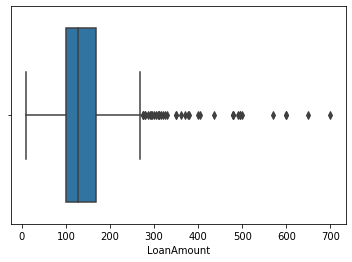

In [20]:
sns.boxplot("LoanAmount",data=loan_data)

Now the fact that this column does infact have outliers is practically possible, because the loan amount can be high for some customers. 

Now let's replace the null values in the column with the mean of this column

In [21]:
loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean(),inplace=True)

In [22]:
loan_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We will combine the two columns ApplicantIncome and CoapplicantIncome inhto a single column as TotalIncome. This will help reduce the dimensionality of the dataset

In [23]:
loan_data["TotalIncome"]=loan_data["ApplicantIncome"]+loan_data["CoapplicantIncome"]
loan_data.drop("ApplicantIncome",axis=1,inplace=True)
loan_data.drop("CoapplicantIncome",axis=1,inplace=True)

# Model Building - Data Preprocessing

### Step 1 : Splitting the data into numerical and categorical variables

##### Numeric Variables

In [24]:
loan_num = loan_data[loan_data.select_dtypes(include=[np.number]).columns.tolist()]
loan_num.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
0,146.412162,360.0,1.0,5849.0
1,128.000000,360.0,1.0,6091.0
2,66.000000,360.0,1.0,3000.0
3,120.000000,360.0,1.0,4941.0
4,141.000000,360.0,1.0,6000.0


##### Categorical Variables

In [25]:
loan_cat = loan_data[loan_data.select_dtypes(include=['object']).columns.tolist()]
loan_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


### Step 2: Encoding the Categorical Variables

The categorical variables need to be encoded before passing them to the model. We will do this using the LabelEncoder Class from the sklearn package

In [26]:
loan_cat=loan_cat.apply(LabelEncoder().fit_transform)
loan_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


### Step 3: Combining the numerical and categorical variables

In [27]:
train = pd.concat([loan_num, loan_cat],axis=1)
train.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,146.412162,360.0,1.0,5849.0,1,0,0,0,0,2,1
1,128.000000,360.0,1.0,6091.0,1,1,1,0,0,0,0
2,66.000000,360.0,1.0,3000.0,1,1,0,0,1,2,1
3,120.000000,360.0,1.0,4941.0,1,1,0,1,0,2,1
4,141.000000,360.0,1.0,6000.0,1,0,0,0,0,2,1


The general dataset after preprocessing will look like this. This data is now ready to build models on it. We need to make sure to follow any particular steps required by any individual model before the model creation.

#### Step 4: Splitting the dependent and independent variables from the test set

Before actually aplitting the dataset into the train and test set we split the dependent and the independent variables from the dataset (X and y variables) 

In [28]:
X = train.drop(["Loan_Status"],axis=1)
y = train["Loan_Status"]

We will use the train_test_split function from the sklearn package to split the data into the training and the testing sets. A test size of 20% is used that means that 20% of the data will be stored as the testing set and the rest 80% as the trainig set. 

In [29]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=312)

At this stage, our data preprocessing step comes to an end. We now have parts of our data.
    1. X_train
    2. y_train
This is the training set on which the model will be built.
    1. X_test
    2. y_test
This is the testing set on which the built model will be tested and the accuracies will be calculated.

# Decision Tree Model

In [30]:
dt=tree.DecisionTreeClassifier(random_state=111,max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=111, splitter='best')

### Training Accuracy

In [31]:
loan=pd.concat([X_train,y_train],axis=1)
loan.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
552,158.0,360.0,1.0,6583.0,1,1,1,0,0,2,1
390,185.0,360.0,1.0,9167.0,1,0,3,0,0,0,1
423,110.0,342.0,0.0,8917.0,1,1,1,0,0,2,0
558,162.0,360.0,1.0,6556.0,1,1,0,0,0,1,1
173,187.0,360.0,1.0,11333.0,1,1,0,0,0,1,1


In [32]:
loan["predicted"]=dt.predict(X_train)
loan.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,predicted
552,158.0,360.0,1.0,6583.0,1,1,1,0,0,2,1,1
390,185.0,360.0,1.0,9167.0,1,0,3,0,0,0,1,1
423,110.0,342.0,0.0,8917.0,1,1,1,0,0,2,0,0
558,162.0,360.0,1.0,6556.0,1,1,0,0,0,1,1,1
173,187.0,360.0,1.0,11333.0,1,1,0,0,0,1,1,1


In [33]:
#Confusion Matrix
matrix=confusion_matrix(loan["predicted"],loan["Loan_Status"])
print(matrix)

[[ 63   5]
 [ 82 341]]


In [34]:
accuracy=(matrix[0][0]+matrix[1][1])/len(loan)*100
print("Decision Tree(Training accuracy): "+str(round(accuracy,2))+"%")

Decision Tree(Training accuracy): 82.28%


### Testing Accuracy

In [35]:
loan1=pd.concat([X_test,y_test],axis=1)
loan1.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
565,120.000000,360.0,1.0,4467.0,1,1,0,1,0,0,1
81,146.412162,360.0,1.0,2395.0,1,1,1,0,1,1,1
268,135.000000,360.0,1.0,3418.0,0,0,0,0,0,0,0
160,98.000000,360.0,1.0,2904.0,1,1,0,1,0,1,1
592,292.000000,360.0,1.0,9357.0,1,0,3,0,1,1,1


In [36]:
loan1["predicted"]=dt.predict(X_test)
loan1.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,predicted
565,120.000000,360.0,1.0,4467.0,1,1,0,1,0,0,1,1
81,146.412162,360.0,1.0,2395.0,1,1,1,0,1,1,1,0
268,135.000000,360.0,1.0,3418.0,0,0,0,0,0,0,0,1
160,98.000000,360.0,1.0,2904.0,1,1,0,1,0,1,1,1
592,292.000000,360.0,1.0,9357.0,1,0,3,0,1,1,1,1


In [37]:
matrix = confusion_matrix(loan1['predicted'],loan1['Loan_Status'])
print(matrix)

[[24  2]
 [23 74]]


In [38]:
accuracy=(matrix[0][0]+matrix[1][1])/len(loan1)*100
print("Decision Tree(Testing accuracy): "+str(round(accuracy,2))+"%")

Decision Tree(Testing accuracy): 79.67%


In [39]:
df=pd.concat([y_train,X_train],axis=1)

In [40]:
features=list(df.columns[1:])

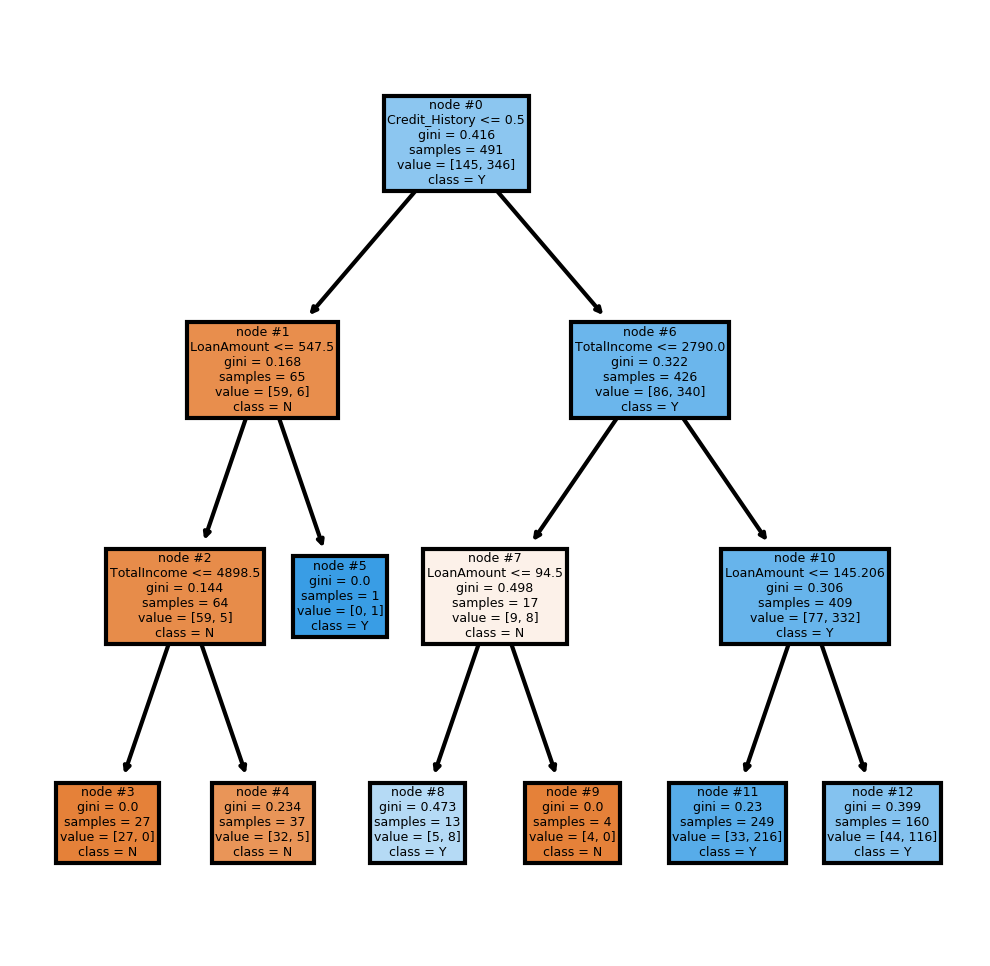

In [41]:
Target=["N","Y"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize=(4,4),dpi=300)
tree.plot_tree(dt,feature_names=features,class_names=Target,filled=True,node_ids=True,fontsize=3);

# Knn Classification Model

In [42]:
X_train.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area
552,158.0,360.0,1.0,6583.0,1,1,1,0,0,2
390,185.0,360.0,1.0,9167.0,1,0,3,0,0,0
423,110.0,342.0,0.0,8917.0,1,1,1,0,0,2
558,162.0,360.0,1.0,6556.0,1,1,0,0,0,1
173,187.0,360.0,1.0,11333.0,1,1,0,0,0,1


In [43]:
X_train_scaled = X_train.copy()
col_names = ['LoanAmount', 'Loan_Amount_Term','TotalIncome']
features = X_train_scaled[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area
552,0.215630,0.743590,1.0,0.077276,1,1,1,0,0,2
390,0.254703,0.743590,1.0,0.119287,1,0,3,0,0,0
423,0.146165,0.705128,0.0,0.115223,1,1,1,0,0,2
558,0.221418,0.743590,1.0,0.076837,1,1,0,0,0,1
173,0.257598,0.743590,1.0,0.154503,1,1,0,0,0,1


In [44]:
X_test_scaled = X_test.copy()
features = X_test_scaled[col_names]
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area
565,0.160637,0.74359,1.0,0.042873,1,1,0,1,0,0
81,0.198860,0.74359,1.0,0.009186,1,1,1,0,1,1
268,0.182344,0.74359,1.0,0.025818,0,0,0,0,0,0
160,0.128799,0.74359,1.0,0.017461,1,1,0,1,0,1
592,0.409551,0.74359,1.0,0.122376,1,0,3,0,1,1


In [45]:
model=KNeighborsClassifier(n_neighbors=12)
model.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

### Training Accuracy

In [46]:
loan["predicted"]= model.predict(X_train_scaled)
loan.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,predicted
552,158.0,360.0,1.0,6583.0,1,1,1,0,0,2,1,1
390,185.0,360.0,1.0,9167.0,1,0,3,0,0,0,1,1
423,110.0,342.0,0.0,8917.0,1,1,1,0,0,2,0,0
558,162.0,360.0,1.0,6556.0,1,1,0,0,0,1,1,1
173,187.0,360.0,1.0,11333.0,1,1,0,0,0,1,1,1


In [47]:
matrix=confusion_matrix(loan["predicted"],loan["Loan_Status"])
print(matrix)

[[ 51   5]
 [ 94 341]]


In [48]:
accuracy=(matrix[0][0]+matrix[1][1])/len(loan)*100
print("K-NN Classification(Training accuracy): "+str(round(accuracy,2))+"%")

K-NN Classification(Training accuracy): 79.84%


### Testting Accuracy

In [49]:
loan1["predicted"]=model.predict(X_test_scaled)
loan1.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,predicted
565,120.000000,360.0,1.0,4467.0,1,1,0,1,0,0,1,1
81,146.412162,360.0,1.0,2395.0,1,1,1,0,1,1,1,1
268,135.000000,360.0,1.0,3418.0,0,0,0,0,0,0,0,1
160,98.000000,360.0,1.0,2904.0,1,1,0,1,0,1,1,1
592,292.000000,360.0,1.0,9357.0,1,0,3,0,1,1,1,1


In [50]:
matrix=confusion_matrix(loan1["predicted"],loan1["Loan_Status"])
print(matrix)

[[16  1]
 [31 75]]


In [51]:
accuracy=(matrix[0][0]+matrix[1][1])/len(loan1)*100
print("K-NN Classification(Testing accuracy): "+str(round(accuracy,2))+"%")

K-NN Classification(Testing accuracy): 73.98%


### Best value for k 

In [52]:
error_rate= []
for k in range(25):
    kvalue=k+1
    model2=KNeighborsClassifier(n_neighbors=kvalue)
    model2.fit(X_train_scaled,y_train)
    ypred=model2.predict(X_test_scaled)
    error_rate.append(np.mean(ypred != y_test))

Minimum error:- 0.2601626016260163 at K = 12


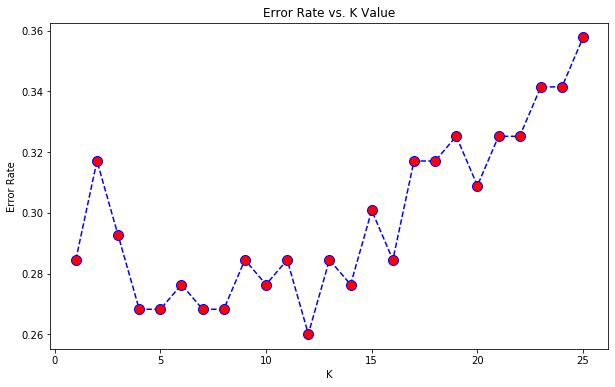

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,26),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

# Naive Bayes Classifier

In [54]:
model= GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Training Accuracy

In [55]:
loan["predicted"]= model.predict(X_train)
loan.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,predicted
552,158.0,360.0,1.0,6583.0,1,1,1,0,0,2,1,1
390,185.0,360.0,1.0,9167.0,1,0,3,0,0,0,1,1
423,110.0,342.0,0.0,8917.0,1,1,1,0,0,2,0,0
558,162.0,360.0,1.0,6556.0,1,1,0,0,0,1,1,1
173,187.0,360.0,1.0,11333.0,1,1,0,0,0,1,1,1


In [56]:
matrix=confusion_matrix(loan["predicted"],loan["Loan_Status"])
print(matrix)

[[ 60   6]
 [ 85 340]]


In [57]:
accuracy=(matrix[0][0]+matrix[1][1])/len(loan)*100
print("Naive Bayes Classifier(Training accuracy): "+str(round(accuracy,2))+"%")

Naive Bayes Classifier(Training accuracy): 81.47%


### Testing Accuracy

In [58]:
loan1["predicted"]= model.predict(X_test)
loan1.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,predicted
565,120.000000,360.0,1.0,4467.0,1,1,0,1,0,0,1,1
81,146.412162,360.0,1.0,2395.0,1,1,1,0,1,1,1,1
268,135.000000,360.0,1.0,3418.0,0,0,0,0,0,0,0,1
160,98.000000,360.0,1.0,2904.0,1,1,0,1,0,1,1,1
592,292.000000,360.0,1.0,9357.0,1,0,3,0,1,1,1,1


In [59]:
matrix=confusion_matrix(loan1["predicted"],loan1["Loan_Status"])
print(matrix)

[[23  1]
 [24 75]]


In [60]:
accuracy=(matrix[0][0]+matrix[1][1])/len(loan1)*100
print("Naive Bayes Classifier(Testing accuracy): "+str(round(accuracy,2))+"%")

Naive Bayes Classifier(Testing accuracy): 79.67%


# Logistic Regression

In [61]:
#fitting Logistic regression
model=LogisticRegression(multi_class="ovr")

In [62]:
model.fit(X_train,y_train)

C:\Users\viraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Training Accuracy

In [63]:
loan["probability"]=""
loan["probability"]= model.predict_proba(X_train)
loan.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,predicted,probability
552,158.0,360.0,1.0,6583.0,1,1,1,0,0,2,1,1,0.175105
390,185.0,360.0,1.0,9167.0,1,0,3,0,0,0,1,1,0.270972
423,110.0,342.0,0.0,8917.0,1,1,1,0,0,2,0,0,0.611132
558,162.0,360.0,1.0,6556.0,1,1,0,0,0,1,1,1,0.196695
173,187.0,360.0,1.0,11333.0,1,1,0,0,0,1,1,1,0.209032


In [64]:
loan["predicted"]= model.predict(X_train)
loan.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,predicted,probability
552,158.0,360.0,1.0,6583.0,1,1,1,0,0,2,1,1,0.175105
390,185.0,360.0,1.0,9167.0,1,0,3,0,0,0,1,1,0.270972
423,110.0,342.0,0.0,8917.0,1,1,1,0,0,2,0,0,0.611132
558,162.0,360.0,1.0,6556.0,1,1,0,0,0,1,1,1,0.196695
173,187.0,360.0,1.0,11333.0,1,1,0,0,0,1,1,1,0.209032


In [65]:
matrix=confusion_matrix(loan["predicted"],loan["Loan_Status"])
print(matrix)

[[ 59   6]
 [ 86 340]]


In [66]:
accuracy=(matrix[0][0]+matrix[1][1])/len(loan)*100
print("Logistic Regression(Training accuracy): "+str(round(accuracy,2))+"%")

Logistic Regression(Training accuracy): 81.26%


In [67]:
print(classification_report(loan['predicted'],loan['Loan_Status']))

              precision    recall  f1-score   support

           0       0.41      0.91      0.56        65
           1       0.98      0.80      0.88       426

    accuracy                           0.81       491
   macro avg       0.69      0.85      0.72       491
weighted avg       0.91      0.81      0.84       491



### Testing Accuracy

In [68]:
loan1["probability"]=""
loan1["probability"]= model.predict_proba(X_test)
loan1.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,predicted,probability
565,120.000000,360.0,1.0,4467.0,1,1,0,1,0,0,1,1,0.254463
81,146.412162,360.0,1.0,2395.0,1,1,1,0,1,1,1,1,0.190998
268,135.000000,360.0,1.0,3418.0,0,0,0,0,0,0,0,1,0.312276
160,98.000000,360.0,1.0,2904.0,1,1,0,1,0,1,1,1,0.232088
592,292.000000,360.0,1.0,9357.0,1,0,3,0,1,1,1,1,0.330168


In [69]:
loan1["predicted"]= model.predict(X_test)
loan1.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,predicted,probability
565,120.000000,360.0,1.0,4467.0,1,1,0,1,0,0,1,1,0.254463
81,146.412162,360.0,1.0,2395.0,1,1,1,0,1,1,1,1,0.190998
268,135.000000,360.0,1.0,3418.0,0,0,0,0,0,0,0,1,0.312276
160,98.000000,360.0,1.0,2904.0,1,1,0,1,0,1,1,1,0.232088
592,292.000000,360.0,1.0,9357.0,1,0,3,0,1,1,1,1,0.330168


In [70]:
matrix=confusion_matrix(loan1["predicted"],loan1["Loan_Status"])
print(matrix)

[[23  2]
 [24 74]]


In [71]:
accuracy=(matrix[0][0]+matrix[1][1])/len(loan1)*100
print("Logistic Regression(Testing accuracy): "+str(round(accuracy,2))+"%")

Logistic Regression(Testing accuracy): 78.86%


In [72]:
print(classification_report(loan1['predicted'],loan1['Loan_Status']))

              precision    recall  f1-score   support

           0       0.49      0.92      0.64        25
           1       0.97      0.76      0.85        98

    accuracy                           0.79       123
   macro avg       0.73      0.84      0.74       123
weighted avg       0.88      0.79      0.81       123

